# Importing Libraries

In [309]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Loading Dataframe

In [310]:
df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Overview of the Dataset

In [311]:
numOfCol = len(df.columns)
numOfRow = len(df.index)
print("There are", numOfCol, "columns and", numOfRow, "rows in this dataset")

There are 14 columns and 178 rows in this dataset


In [312]:
# prints the variables (names of the columns)
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

The 'Alcohol' and 'Proline' appears to have a positive correlation


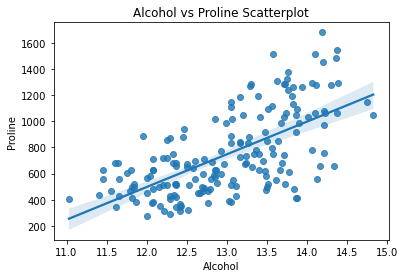

In [313]:
# Scatterplot showing the  relationship between Alcohol and Proline
sns.regplot(x = "Alcohol", y = "Proline", data = df)
plt.title('Alcohol vs Proline Scatterplot')
print("The 'Alcohol' and 'Proline' appears to have a positive correlation")

# KNN Algorithm

In [314]:
df.drop(['Malic.acid', 'Mg', 'Color.int','Nonflavanoid.phenols'], axis=1)

,Wine,Alcohol,Ash,Acl,Phenols,Flavanoids,Proanth,Hue,OD,Proline
0,1,14.23,2.43,15.6,2.80,3.06,2.29,1.04,3.92,1065
1,1,13.20,2.14,11.2,2.65,2.76,1.28,1.05,3.40,1050
2,1,13.16,2.67,18.6,2.80,3.24,2.81,1.03,3.17,1185
3,1,14.37,2.50,16.8,3.85,3.49,2.18,0.86,3.45,1480
4,1,13.24,2.87,21.0,2.80,2.69,1.82,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.45,20.5,1.68,0.61,1.06,0.64,1.74,740
174,3,13.40,2.48,23.0,1.80,0.75,1.41,0.70,1.56,750
175,3,13.27,2.26,20.0,1.59,0.69,1.35,0.59,1.56,835
176,3,13.17,2.37,20.0,1.65,0.68,1.46,0.60,1.62,840


In [315]:
# spliting the data
train, test = train_test_split(df, test_size = 0.2)

In [316]:
# finding the number of data points for training
numOfTrain = train.shape[0]
print("There are", numOfTrain, "data points for training")

There are 142 data points for training


In [317]:
# finding the number of data points for testing
numOfTest = test.shape[0]
print("There are", numOfTest, "data points for testing")

There are 36 data points for testing


In [318]:
# saving the pickle file for training
with open('C:/Users/kimta/Introduction to Machine Learning/processed_data/wine_train_data.pkl', 'wb') as train_data:
  pickle.dump(train, train_data)
train

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
29,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
57,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
104,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515


In [319]:
# saving the pickle file for testing
with open('C:/Users/kimta/Introduction to Machine Learning/processed_data/wine_test_data.pkl', 'wb') as test_data:
  pickle.dump(test, test_data)
test

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
86,2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
42,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530


In [320]:
# loading the pickle file for training
with open('C:/Users/kimta/Introduction to Machine Learning/processed_data/wine_train_data.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
train

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
29,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
57,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
104,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515


In [321]:
# loading the pickle file for testing
with open('C:/Users/kimta/Introduction to Machine Learning/processed_data/wine_test_data.pkl', 'rb') as test_data:
    test = pickle.load(test_data)
test

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
86,2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
42,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530


In [322]:
# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
kCount = 0
k_list = []
for i in range(3, max_k_range, 1):
    k_list.append(i)
    kCount = kCount + 1
    
cross_validation_scores = []
x_train = train[['Acl', 'Color.int', 'Flavanoids']]
y_train = train[['Wine']]

In [323]:
# 10-fold cv
cvsCount = 0
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    cvsCount = cvsCount + 1
    
cross_validation_scores

[0.872857142857143,
 0.900952380952381,
 0.8942857142857144,
 0.8799999999999999,
 0.9085714285714286,
 0.8800000000000001,
 0.8728571428571428,
 0.8795238095238094,
 0.8942857142857144,
 0.8942857142857144,
 0.8871428571428572,
 0.8795238095238096,
 0.8938095238095238,
 0.858095238095238,
 0.8723809523809525,
 0.8723809523809523,
 0.8376190476190477,
 0.8376190476190477,
 0.8442857142857143,
 0.8442857142857143,
 0.8300000000000001,
 0.8233333333333333,
 0.809047619047619,
 0.809047619047619,
 0.8161904761904761,
 0.8161904761904761,
 0.8019047619047619,
 0.8161904761904761,
 0.8080952380952381,
 0.8014285714285714,
 0.800952380952381,
 0.7804761904761905,
 0.7938095238095239,
 0.7733333333333333,
 0.78,
 0.7733333333333333,
 0.78,
 0.78,
 0.78,
 0.7657142857142857,
 0.78,
 0.7728571428571429,
 0.78,
 0.7657142857142857,
 0.7519047619047619,
 0.7733333333333333,
 0.7661904761904762,
 0.7733333333333333,
 0.7733333333333333,
 0.7661904761904762,
 0.7657142857142857,
 0.7447619047619047

In [324]:
print("There are", kCount, "k")  
print("There are", cvsCount, "cross validation scores")

There are 68 k
There are 68 cross validation scores


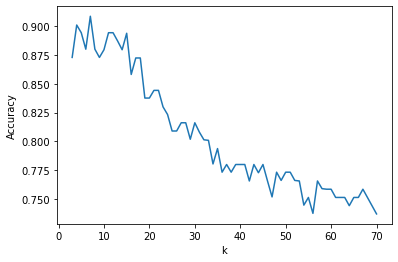

In [325]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [326]:
# finding best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is", str(k))

The best number of k is 7


In [327]:
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['Acl', 'Color.int', 'Flavanoids']]
# select target
y_train = train[['Wine']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['Acl', 'Color.int', 'Flavanoids']]

#select target
y_test = test[['Wine']]

# test
pred = knn.predict(x_test)

In [328]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,2,2
1,2,2
2,3,3
3,3,3
4,1,1
5,1,1
6,2,2
7,1,1
8,1,1
9,3,3


In [329]:
# check accuracy
print("The accuracy is " + str(accuracy_score(y_test.values.ravel(), pred)))

The accuracy is 0.9444444444444444
